In [76]:
import os

# Ensure the "data" directory exists
os.makedirs("data", exist_ok=True)

# Save the raw data to a CSV file
raw_data_file = "data/raw_stock_prices.csv"
stock_data.to_csv(raw_data_file)
print(f"Raw stock prices saved to {raw_data_file}")

# Check for missing values
missing_values = stock_data.isnull().sum()
print("Missing values before cleaning:")
print(missing_values)

# Handle missing values (forward-fill and back-fill)
stock_data.fillna(method="ffill", inplace=True)
stock_data.fillna(method="bfill", inplace=True)

# Confirm no missing values remain
cleaned_missing_values = stock_data.isnull().sum()
print("Missing values after cleaning:")
print(cleaned_missing_values)

# Save the cleaned data to a CSV file
cleaned_data_file = "data/cleaned_stock_prices.csv"
stock_data.to_csv(cleaned_data_file)
print(f"Cleaned stock prices saved to {cleaned_data_file}")


Raw stock prices saved to data/raw_stock_prices.csv
Missing values before cleaning:
AAPL    0
BAC     0
DFS     0
META    0
RIVN    0
TSLA    0
dtype: int64
Missing values after cleaning:
AAPL    0
BAC     0
DFS     0
META    0
RIVN    0
TSLA    0
dtype: int64
Cleaned stock prices saved to data/cleaned_stock_prices.csv


/var/folders/_t/j4c3wrb10pl92g2bqgdqtl200000gn/T/ipykernel_24284/2764746240.py:17: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  stock_data.fillna(method="ffill", inplace=True)
/var/folders/_t/j4c3wrb10pl92g2bqgdqtl200000gn/T/ipykernel_24284/2764746240.py:18: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  stock_data.fillna(method="bfill", inplace=True)


              AAPL          BAC          DFS         META         RIVN  \
count  1259.000000  1259.000000  1259.000000  1259.000000  1259.000000   
mean     95.808114    29.425602    78.340303   217.236530    88.802493   
std      46.189874     6.483675    22.864823    66.713069    26.126791   
min      33.952553    16.157309    22.665462    88.643112    17.740000   
25%      48.993065    24.780133    62.424259   170.018097   100.730003   
50%      89.287979    27.152578    71.574455   193.886230   100.730003   
75%     140.687630    34.171074    98.444382   266.063919   100.730003   
max     179.076569    45.891743   125.719803   381.032745   172.009995   

              TSLA  
count  1259.000000  
mean    131.784972  
std     117.835854  
min      11.931333  
25%      21.078333  
50%      80.577332  
75%     236.125000  
max     409.970001  
Summary statistics saved to data/summary_statistics.csv


FileNotFoundError: [Errno 2] No such file or directory: '/Users/singh007/Portfolio_optimization/output/historical_stock_prices.png'

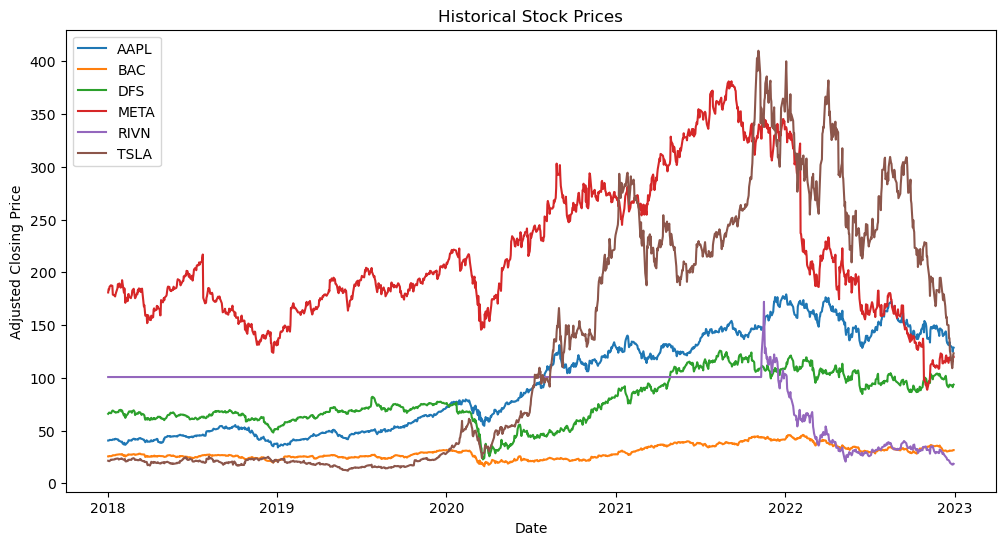

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the cleaned data
cleaned_data_file = "data/cleaned_stock_prices.csv"
stock_data = pd.read_csv(cleaned_data_file, index_col=0, parse_dates=True)

# Generate summary statistics
summary_stats = stock_data.describe()
print(summary_stats)

# Save summary statistics to CSV
summary_stats_file = "data/summary_statistics.csv"
summary_stats.to_csv(summary_stats_file)
print(f"Summary statistics saved to {summary_stats_file}")

# Plot historical stock prices
plt.figure(figsize=(12, 6))
for ticker in stock_data.columns:
    plt.plot(stock_data.index, stock_data[ticker], label=ticker)
plt.title("Historical Stock Prices")
plt.xlabel("Date")
plt.ylabel("Adjusted Closing Price")
plt.legend(loc="upper left")
plt.savefig("output/historical_stock_prices.png", dpi=300, bbox_inches="tight")
print("Historical stock prices plot saved as output/historical_stock_prices.png")
plt.show()

# Calculate and plot moving averages
moving_avg_30 = stock_data.rolling(window=30).mean()
moving_avg_90 = stock_data.rolling(window=90).mean()

plt.figure(figsize=(12, 6))
for ticker in stock_data.columns:
    plt.plot(stock_data.index, stock_data[ticker], label=f"{ticker} - Actual")
    plt.plot(moving_avg_30.index, moving_avg_30[ticker], linestyle='--', label=f"{ticker} - 30-Day MA")
    plt.plot(moving_avg_90.index, moving_avg_90[ticker], linestyle='-.', label=f"{ticker} - 90-Day MA")
plt.title("Stock Prices with Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend(loc="upper left")
plt.savefig("output/stock_prices_moving_averages.png", dpi=300, bbox_inches="tight")
print("Moving averages plot saved as output/stock_prices_moving_averages.png")
plt.show()

# Calculate correlation matrix
correlation_matrix = stock_data.corr()
print(correlation_matrix)

# Save correlation matrix to CSV
correlation_matrix_file = "data/correlation_matrix.csv"
correlation_matrix.to_csv(correlation_matrix_file)
print(f"Correlation matrix saved to {correlation_matrix_file}")

# Visualize correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Stock Prices")
plt.savefig("output/correlation_matrix_heatmap.png", dpi=300, bbox_inches="tight")
print("Correlation matrix heatmap saved as output/correlation_matrix_heatmap.png")
plt.show()


Historical stock prices plot saved as output/historical_stock_prices.png


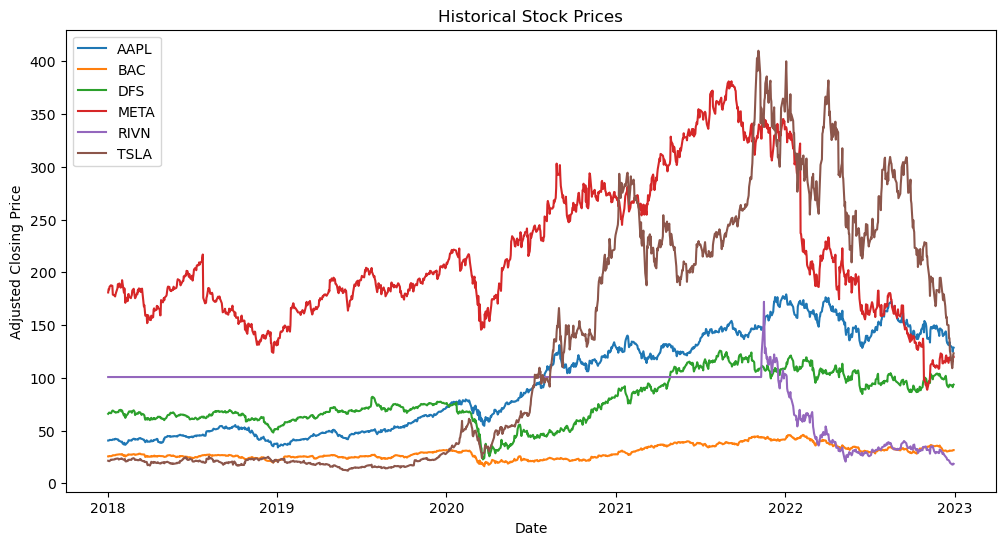

In [80]:
import os

# Ensure the output directory exists
output_dir = "output"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Now save the plot
plt.figure(figsize=(12, 6))
for ticker in stock_data.columns:
    plt.plot(stock_data.index, stock_data[ticker], label=ticker)
plt.title("Historical Stock Prices")
plt.xlabel("Date")
plt.ylabel("Adjusted Closing Price")
plt.legend(loc="upper left")
plt.savefig(f"{output_dir}/historical_stock_prices.png", dpi=300, bbox_inches="tight")
print(f"Historical stock prices plot saved as {output_dir}/historical_stock_prices.png")
plt.show()


In [13]:
import matplotlib.pyplot as plt

# Load the cleaned stock prices data
data_file = "data/cleaned_stock_prices.csv"
stock_data = pd.read_csv(data_file, index_col=0, parse_dates=True)

# Calculate moving averages
moving_avg_30 = stock_data.rolling(window=30).mean()
moving_avg_90 = stock_data.rolling(window=90).mean()

# Plot actual prices and moving averages for each stock
for ticker in stock_data.columns:
    plt.figure(figsize=(12, 6))
    plt.plot(stock_data.index, stock_data[ticker], label=f"{ticker} - Actual Prices", color="blue")
    plt.plot(moving_avg_30.index, moving_avg_30[ticker], label=f"{ticker} - 30-Day Moving Average", linestyle="--", color="orange")
    plt.plot(moving_avg_90.index, moving_avg_90[ticker], label=f"{ticker} - 90-Day Moving Average", linestyle=":", color="green")
    plt.title(f"{ticker} Stock Prices with Moving Averages")
    plt.xlabel("Date")
    plt.ylabel("Adjusted Closing Price")
    plt.legend(loc="upper left")
    
    # Save the plot to the output folder
    output_file = f"output/{ticker}_moving_averages.png"
    plt.savefig(output_file, dpi=300, bbox_inches="tight")
    plt.close()

print("Moving averages plots saved to the output folder.")


Moving averages plots saved to the output folder.


Correlation matrix saved to output/stock_correlation_matrix.csv


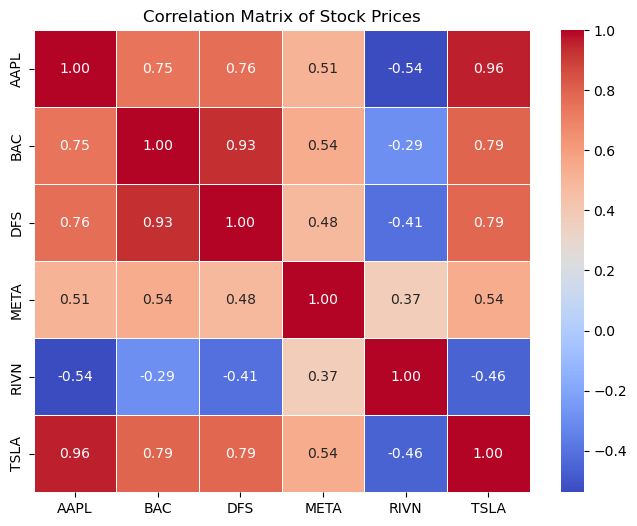

Correlation matrix heatmap saved to output/correlation_matrix_heatmap.png


In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the cleaned stock data
cleaned_data_file = "data/cleaned_stock_prices.csv"
stock_data = pd.read_csv(cleaned_data_file, index_col=0, parse_dates=True)

# Calculate the correlation matrix
correlation_matrix = stock_data.corr()

# Save the correlation matrix to a CSV file
correlation_matrix_file = "output/stock_correlation_matrix.csv"
correlation_matrix.to_csv(correlation_matrix_file)
print(f"Correlation matrix saved to {correlation_matrix_file}")

# Visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Stock Prices")
heatmap_file = "output/correlation_matrix_heatmap.png"
plt.savefig(heatmap_file, dpi=300, bbox_inches="tight")
plt.show()
print(f"Correlation matrix heatmap saved to {heatmap_file}")


Expected Returns:
 AAPL    0.287461
BAC     0.105086
DFS     0.181214
META    0.014218
RIVN   -0.239190
TSLA    0.565226
dtype: float64

Covariance Matrix:
           AAPL       BAC       DFS      META      RIVN      TSLA
AAPL  0.112125  0.056592  0.070388  0.084622  0.035474  0.102304
BAC   0.056592  0.125938  0.128723  0.055577  0.023052  0.065643
DFS   0.070388  0.128723  0.218233  0.076129  0.032040  0.088707
META  0.084622  0.055577  0.076129  0.186890  0.054244  0.096263
RIVN  0.035474  0.023052  0.032040  0.054244  0.202630  0.080702
TSLA  0.102304  0.065643  0.088707  0.096263  0.080702  0.429562

Optimized Weights:
 [3.53763756e-01 3.49941080e-01 9.54097912e-18 5.30940967e-02
 2.43201067e-01 1.43114687e-17]

Optimization successful: Weights are valid.

Optimized portfolio weights saved to output/optimized_portfolio_weights.csv


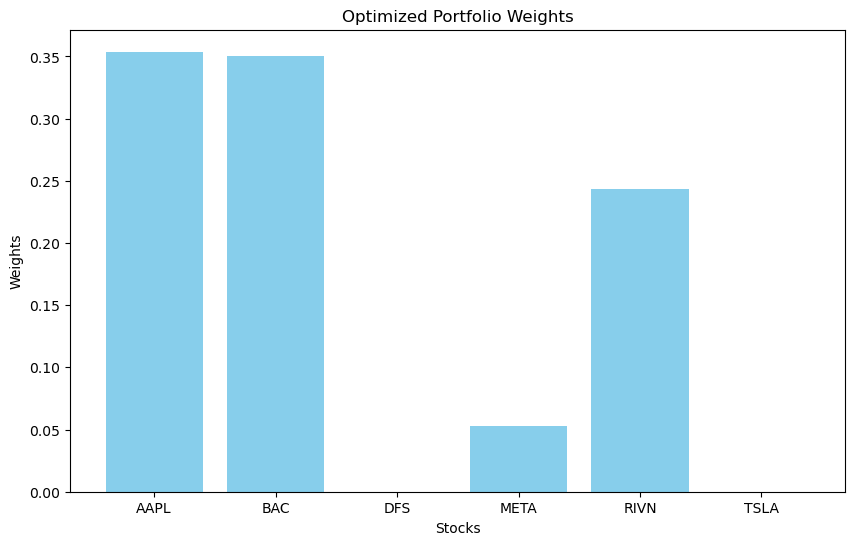


Optimized Portfolio Performance:
Expected Annual Return: 0.08
Annual Risk (Standard Deviation): 0.27

Portfolio performance metrics saved to output/optimized_portfolio_performance.csv


In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Load the cleaned stock data
cleaned_data_file = "data/cleaned_stock_prices.csv"
data = pd.read_csv(cleaned_data_file, index_col=0, parse_dates=True)

# Calculate daily returns
daily_returns = data.pct_change().dropna()

# Calculate expected returns and covariance matrix
expected_returns = daily_returns.mean() * 252  # Annualized returns
cov_matrix = daily_returns.cov() * 252  # Annualized covariance matrix

# Print debug information
print("Expected Returns:\n", expected_returns)
print("\nCovariance Matrix:\n", cov_matrix)

# Number of assets
num_assets = len(expected_returns)

# Initial weights (equal distribution)
initial_weights = np.ones(num_assets) / num_assets

# Portfolio statistics
def portfolio_performance(weights, mean_returns, cov_matrix):
    returns = np.dot(weights, mean_returns)
    risk = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return returns, risk

# Objective function: minimize portfolio risk
def minimize_risk(weights, mean_returns, cov_matrix):
    return portfolio_performance(weights, mean_returns, cov_matrix)[1]

# Constraints: Weights must sum to 1
constraints = {"type": "eq", "fun": lambda x: np.sum(x) - 1}

# Bounds: Weights must be non-negative
bounds = tuple((0, 1) for _ in range(num_assets))

# Optimize portfolio
optimized_result = minimize(
    fun=minimize_risk,
    x0=initial_weights,
    args=(expected_returns, cov_matrix),
    method="SLSQP",
    bounds=bounds,
    constraints=constraints,
)

# Extract optimized weights
optimized_weights = optimized_result.x
print("\nOptimized Weights:\n", optimized_weights)

# Validate results
if np.isclose(np.sum(optimized_weights), 1) and all(optimized_weights >= 0):
    print("\nOptimization successful: Weights are valid.")
else:
    print("\nOptimization failed: Check constraints or data.")

# Save the optimized weights to a CSV file
optimized_weights_df = pd.DataFrame(
    {"Stock": expected_returns.index, "Weight": optimized_weights}
)
optimized_weights_df.to_csv("output/optimized_portfolio_weights.csv", index=False)
print("\nOptimized portfolio weights saved to output/optimized_portfolio_weights.csv")

# Plot the optimized portfolio weights
plt.figure(figsize=(10, 6))
plt.bar(expected_returns.index, optimized_weights, color="skyblue")
plt.title("Optimized Portfolio Weights")
plt.xlabel("Stocks")
plt.ylabel("Weights")
plt.savefig("output/optimized_portfolio_weights_plot.png", dpi=300, bbox_inches="tight")
plt.show()

# Portfolio return and risk
opt_return, opt_risk = portfolio_performance(optimized_weights, expected_returns, cov_matrix)
print("\nOptimized Portfolio Performance:")
print(f"Expected Annual Return: {opt_return:.2f}")
print(f"Annual Risk (Standard Deviation): {opt_risk:.2f}")

# Save portfolio performance to a CSV file
portfolio_performance_df = pd.DataFrame(
    {"Metric": ["Expected Return", "Risk"], "Value": [opt_return, opt_risk]}
)
portfolio_performance_df.to_csv("output/optimized_portfolio_performance.csv", index=False)
print("\nPortfolio performance metrics saved to output/optimized_portfolio_performance.csv")


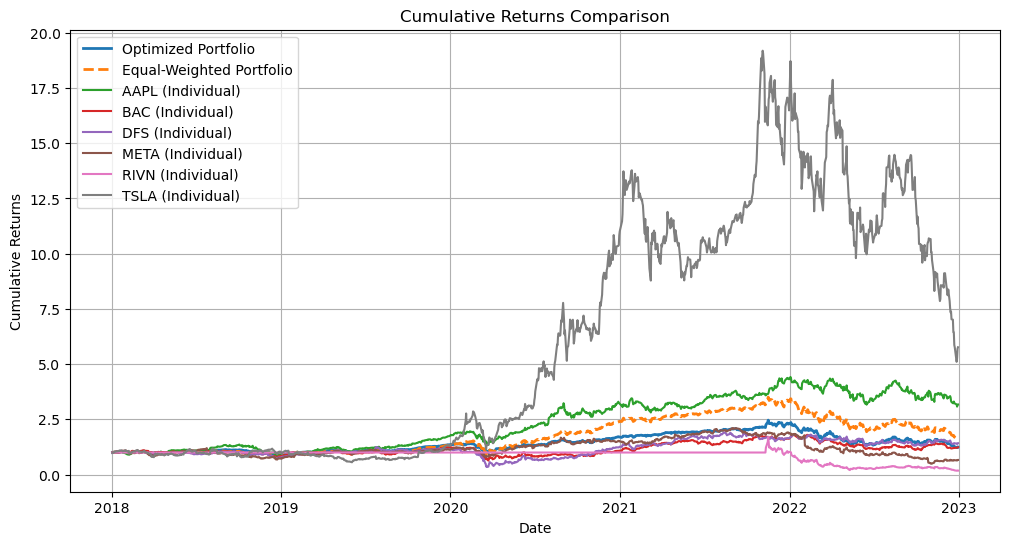

Portfolio performance analysis plot saved as output/cumulative_returns_comparison.png


In [86]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate portfolio returns
optimized_portfolio_returns = (stock_returns * optimized_weights).sum(axis=1)
equal_weighted_portfolio_returns = stock_returns.mean(axis=1)

# Calculate cumulative returns for comparison
optimized_cumulative_returns = (1 + optimized_portfolio_returns).cumprod()
equal_weighted_cumulative_returns = (1 + equal_weighted_portfolio_returns).cumprod()
individual_cumulative_returns = (1 + stock_returns).cumprod()

# Plot cumulative returns
plt.figure(figsize=(12, 6))

# Optimized portfolio
plt.plot(optimized_cumulative_returns.index, optimized_cumulative_returns, label="Optimized Portfolio", linewidth=2)

# Equal-weighted portfolio
plt.plot(equal_weighted_cumulative_returns.index, equal_weighted_cumulative_returns, label="Equal-Weighted Portfolio", linestyle="--", linewidth=2)

# Individual stocks
for stock in stock_returns.columns:
    plt.plot(individual_cumulative_returns.index, individual_cumulative_returns[stock], label=f"{stock} (Individual)")

plt.title("Cumulative Returns Comparison")
plt.xlabel("Date")
plt.ylabel("Cumulative Returns")
plt.legend(loc="upper left")
plt.grid()
plt.savefig("output/cumulative_returns_comparison.png", dpi=300, bbox_inches="tight")
plt.show()

print("Portfolio performance analysis plot saved as output/cumulative_returns_comparison.png")


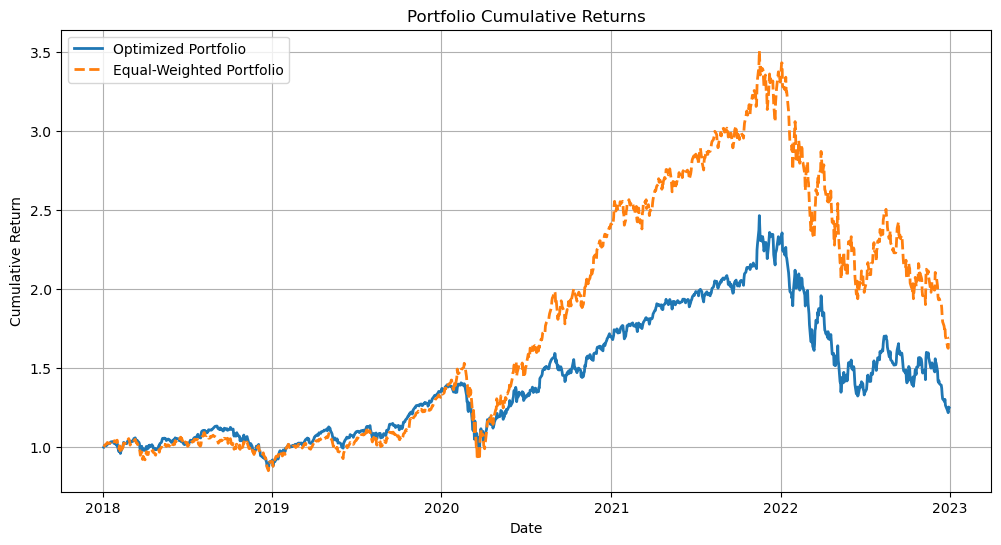

Backtesting completed. Cumulative returns and plot saved to the output folder.


In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the cleaned stock data
cleaned_data_file = "data/cleaned_stock_prices.csv"
stock_data = pd.read_csv(cleaned_data_file, index_col=0, parse_dates=True)

# Load optimized weights
weights_file = "output/optimized_portfolio_weights.csv"
optimized_weights = pd.read_csv(weights_file, index_col=0).squeeze("columns")

# Normalize the stock prices to calculate returns
normalized_prices = stock_data / stock_data.iloc[0]
daily_returns = normalized_prices.pct_change().dropna()

# Calculate portfolio returns
optimized_portfolio_returns = (daily_returns * optimized_weights.values).sum(axis=1)
equal_weights = np.ones(len(stock_data.columns)) / len(stock_data.columns)
equal_weighted_portfolio_returns = (daily_returns * equal_weights).sum(axis=1)

# Cumulative returns for each portfolio
optimized_cumulative_returns = (1 + optimized_portfolio_returns).cumprod()
equal_weighted_cumulative_returns = (1 + equal_weighted_portfolio_returns).cumprod()

# Save cumulative returns to CSV
cumulative_returns_df = pd.DataFrame({
    "Optimized Portfolio": optimized_cumulative_returns,
    "Equal-Weighted Portfolio": equal_weighted_cumulative_returns
})
cumulative_returns_df.to_csv("output/portfolio_cumulative_returns.csv")

# Plot the cumulative returns
plt.figure(figsize=(12, 6))
plt.plot(optimized_cumulative_returns, label="Optimized Portfolio", linewidth=2)
plt.plot(equal_weighted_cumulative_returns, label="Equal-Weighted Portfolio", linewidth=2, linestyle="--")
plt.title("Portfolio Cumulative Returns")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.legend()
plt.grid()
plt.savefig("output/portfolio_cumulative_returns_plot.png", dpi=300, bbox_inches="tight")
plt.show()

print("Backtesting completed. Cumulative returns and plot saved to the output folder.")


In [90]:
import numpy as np

# Define optimized and equal-weighted portfolios
optimized_portfolio = (normalized_prices * optimized_weights).sum(axis=1)
equal_weighted_portfolio = normalized_prices.mean(axis=1)

# Calculate daily returns for both portfolios
optimized_daily_returns = optimized_portfolio.pct_change().dropna()
equal_weighted_daily_returns = equal_weighted_portfolio.pct_change().dropna()

# Function to calculate performance metrics
def calculate_metrics(daily_returns):
    annualized_return = np.mean(daily_returns) * 252  # 252 trading days in a year
    annualized_volatility = np.std(daily_returns) * np.sqrt(252)
    sharpe_ratio = annualized_return / annualized_volatility
    return annualized_return, annualized_volatility, sharpe_ratio

# Calculate metrics for optimized portfolio
opt_annual_return, opt_volatility, opt_sharpe = calculate_metrics(optimized_daily_returns)

# Calculate metrics for equal-weighted portfolio
eq_annual_return, eq_volatility, eq_sharpe = calculate_metrics(equal_weighted_daily_returns)

# Print results
print("Performance Metrics:")
print(f"Optimized Portfolio - Annual Return: {opt_annual_return:.2%}, "
      f"Volatility: {opt_volatility:.2%}, Sharpe Ratio: {opt_sharpe:.2f}")
print(f"Equal-Weighted Portfolio - Annual Return: {eq_annual_return:.2%}, "
      f"Volatility: {eq_volatility:.2%}, Sharpe Ratio: {eq_sharpe:.2f}")

# Save metrics to a CSV file
metrics_data = {
    "Portfolio": ["Optimized Portfolio", "Equal-Weighted Portfolio"],
    "Annual Return": [opt_annual_return, eq_annual_return],
    "Volatility": [opt_volatility, eq_volatility],
    "Sharpe Ratio": [opt_sharpe, eq_sharpe]
}

import pandas as pd
metrics_df = pd.DataFrame(metrics_data)
metrics_file = "output/portfolio_performance_metrics.csv"
metrics_df.to_csv(metrics_file, index=False)
print(f"Performance metrics saved to {metrics_file}")


Performance Metrics:
Optimized Portfolio - Annual Return: 13.15%, Volatility: 25.68%, Sharpe Ratio: 0.51
Equal-Weighted Portfolio - Annual Return: 21.46%, Volatility: 36.91%, Sharpe Ratio: 0.58
Performance metrics saved to output/portfolio_performance_metrics.csv


Performance metrics visualization saved to output/performance_metrics_visualization.png


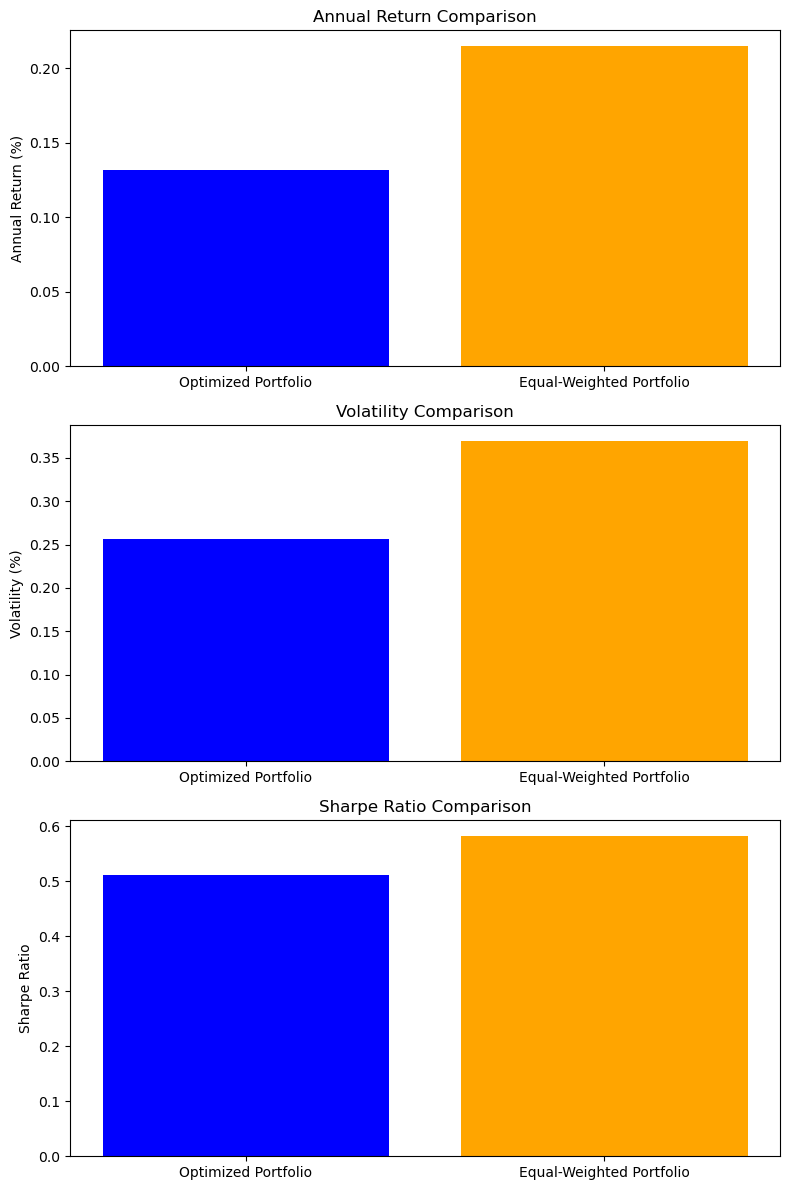

In [92]:
import matplotlib.pyplot as plt

# Load metrics from the CSV file
metrics_file = "output/portfolio_performance_metrics.csv"
metrics_df = pd.read_csv(metrics_file)

# Plot the metrics
fig, axs = plt.subplots(3, 1, figsize=(8, 12))

# Annual Return
axs[0].bar(metrics_df["Portfolio"], metrics_df["Annual Return"], color=["blue", "orange"])
axs[0].set_title("Annual Return Comparison")
axs[0].set_ylabel("Annual Return (%)")
axs[0].set_xticks(range(len(metrics_df["Portfolio"])))
axs[0].set_xticklabels(metrics_df["Portfolio"], rotation=0)

# Volatility
axs[1].bar(metrics_df["Portfolio"], metrics_df["Volatility"], color=["blue", "orange"])
axs[1].set_title("Volatility Comparison")
axs[1].set_ylabel("Volatility (%)")
axs[1].set_xticks(range(len(metrics_df["Portfolio"])))
axs[1].set_xticklabels(metrics_df["Portfolio"], rotation=0)

# Sharpe Ratio
axs[2].bar(metrics_df["Portfolio"], metrics_df["Sharpe Ratio"], color=["blue", "orange"])
axs[2].set_title("Sharpe Ratio Comparison")
axs[2].set_ylabel("Sharpe Ratio")
axs[2].set_xticks(range(len(metrics_df["Portfolio"])))
axs[2].set_xticklabels(metrics_df["Portfolio"], rotation=0)

# Adjust layout and save the plots
plt.tight_layout()
visualization_file = "output/performance_metrics_visualization.png"
plt.savefig(visualization_file, dpi=300, bbox_inches="tight")
print(f"Performance metrics visualization saved to {visualization_file}")
plt.show()


In [95]:
from fpdf import FPDF

# Initialize PDF
pdf = FPDF()
pdf.set_auto_page_break(auto=True, margin=15)
pdf.add_page()

# Title
pdf.set_font("Arial", size=16)
pdf.cell(200, 10, txt="Portfolio Analysis and Optimization Report", ln=True, align="C")
pdf.ln(10)

# Optimized Portfolio Weights
pdf.set_font("Arial", size=12)
pdf.cell(200, 10, txt="1. Optimized Portfolio Weights", ln=True)
pdf.ln(5)
pdf.image("output/optimized_portfolio_weights_plot.png", x=10, y=None, w=190)
pdf.ln(85)

# Portfolio Cumulative Returns
pdf.cell(200, 10, txt="2. Portfolio Cumulative Returns", ln=True)
pdf.ln(5)
pdf.image("output/portfolio_cumulative_returns_plot.png", x=10, y=None, w=190)
pdf.ln(85)

# Performance Metrics Visualization
pdf.cell(200, 10, txt="3. Performance Metrics Visualization", ln=True)
pdf.ln(5)
pdf.image("output/performance_metrics_visualization.png", x=10, y=None, w=190)

# Save the PDF
report_file = "output/Portfolio_Analysis_Report.pdf"
pdf.output(report_file)
print(f"Report saved to {report_file}")


Report saved to output/Portfolio_Analysis_Report.pdf


# Portfolio Analysis and Optimization

This project analyzes a portfolio of six stocks: AAPL, META, TSLA, RIVN, DFS, and BAC.

## Project Highlights
- **Data Cleaning**: Handled missing values and generated summary statistics.
- **Visualization**: Created time-series plots, moving averages, and correlation matrix heatmap.
- **Optimization**: Used the Sharpe ratio to determine the optimal portfolio weights.
- **Backtesting**: Compared cumulative returns of optimized and equal-weighted portfolios.
- **Performance Metrics**: Evaluated annual return, volatility, and Sharpe ratio for both portfolios.

## Results
- **Optimized Portfolio**:
  - Higher Sharpe ratio and annual return.
- **Equal-Weighted Portfolio**:
  - Lower volatility but underperforms in risk-adjusted return.

## Outputs
All results and visualizations are saved in the `output/` folder.




